# Текст задания

Нужно сгенерировать 3 cлучайных нелинейных регрессии. Для обоих частей задания зафиксировать размерности 2-3х линейных слоев, их активации, функцию потери, lr и оптимизатор, кол-во эпох. \\
Первая часть задания: протестировать модель только с батчнормом с 3 разными
размерами батча. \\
Вторая часть: протестировать модель с лучшим размером батча из первой части
* без дропаута и без батчнорма,
* только с батчнормом без дропаута,
* только с дропаутом без батчнорма,
* и с батчнормом и с дропаутом.

Визуализировать результаты. \\
В пару предложений записать выводы.

# Код

## Imports

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

## Датасет

<Axes: xlabel='x1', ylabel='y'>

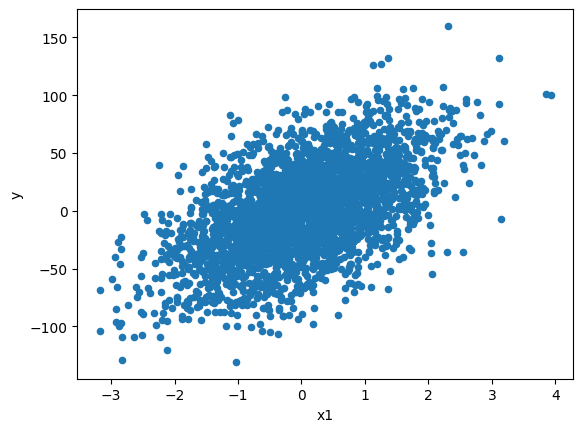

In [22]:
X, y = make_regression(n_samples=3000, n_features=5, noise=1, random_state=42)
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y
df.plot(x='x1', y='y', kind='scatter')

In [23]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
dataset = TensorDataset(X_tensor, y_tensor)

In [24]:
input_size = 2
hidden_size1 = 16
hidden_size2 = 8
output_size = 1
activation = nn.ReLU()
loss_function = nn.MSELoss()
learning_rate = 0.01
optimizer_class = optim.Adam
num_epochs = 100

In [25]:
def create_model(batch_norm=False, dropout=False):
    layers = []
    layers.append(nn.Linear(input_size, hidden_size1))

    if batch_norm:
        layers.append(nn.BatchNorm1d(hidden_size1))

    layers.append(activation)

    if dropout:
        layers.append(nn.Dropout(0.5))

    layers.append(nn.Linear(hidden_size1, hidden_size2))

    if batch_norm:
        layers.append(nn.BatchNorm1d(hidden_size2))

    layers.append(activation)

    if dropout:
        layers.append(nn.Dropout(0.5))

    layers.append(nn.Linear(hidden_size2, output_size))

    return nn.Sequential(*layers)

## Part I

In [26]:
batch_sizes = [16, 32, 64]
results_batch_norm = {}

for batch_size in batch_sizes:
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    model = create_model(batch_norm=True)
    optimizer = optimizer_class(model.parameters(), lr=learning_rate)
    losses = []

    for epoch in range(num_epochs):
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_function(outputs, targets)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())

    results_batch_norm[batch_size] = losses

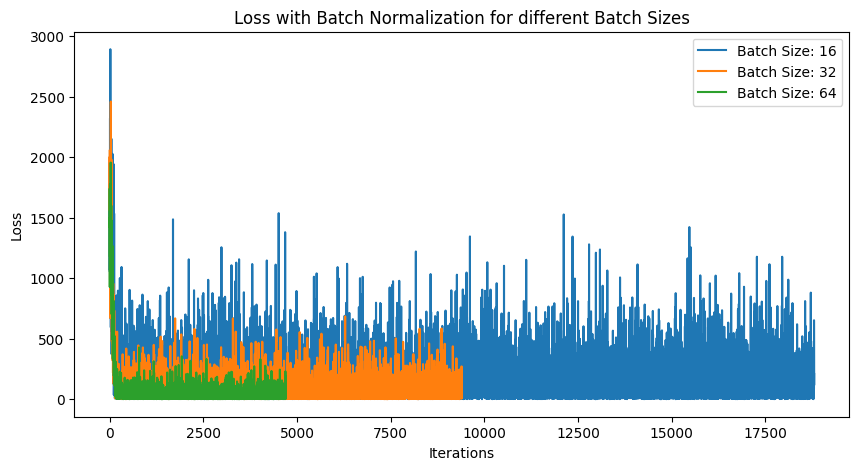

In [27]:
plt.figure(figsize=(10, 5))

for batch_size, losses in results_batch_norm.items():
    plt.plot(losses, label=f'Batch Size: {batch_size}')

plt.title('Loss with Batch Normalization for different Batch Sizes')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Part II

In [28]:
best_batch_size = 64
dataloader = DataLoader(dataset, batch_size=best_batch_size, shuffle=True)
results_combinations = {}

configurations = {
    'No BN, No Dropout': (False, False),
    'BN, No Dropout': (True, False),
    'No BN, Dropout': (False, True),
    'BN, Dropout': (True, True)
}

for name, (batch_norm, dropout) in configurations.items():
    model = create_model(batch_norm=batch_norm, dropout=dropout)
    optimizer = optimizer_class(model.parameters(), lr=learning_rate)
    losses = []

    for epoch in range(num_epochs):
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_function(outputs, targets)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())

    results_combinations[name] = losses

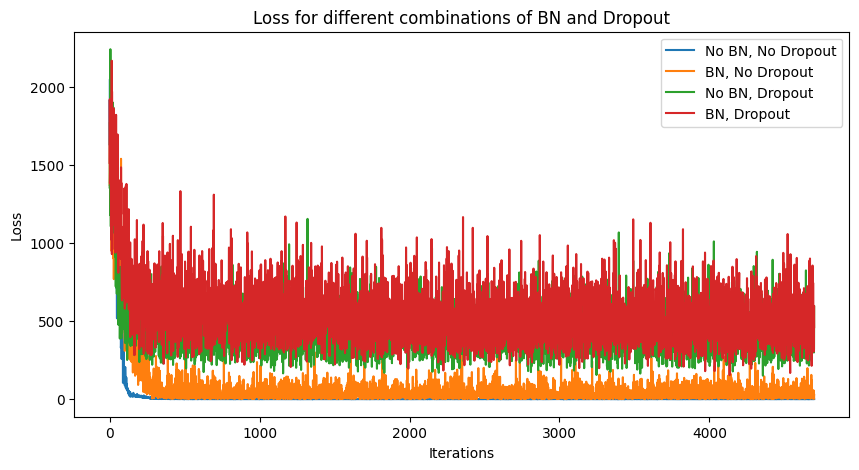

In [29]:
plt.figure(figsize=(10, 5))
for name, losses in results_combinations.items():
    plt.plot(losses, label=name)
plt.title('Loss for different combinations of BN and Dropout')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()